# WeatherPy
----



### Analysis

This analysis begins with the random collection of over 500 cities, varying in distances from the equator
(latitude = 0).By obtaining data that is specific to the cities unique geo-graphical locstion, comparisons 
of these latitudes against their local temperatures, wind speeds and relative percentages of humidity and 
cloud cover recorded. Of the four, the strongest correlation was between Latitude and Temperature. As hypothesised,
temperatures increased, as the distance from the equator decereased, peaking at a latitude of 30o.

The remaining data can be utilised to determine the following:
-Latitude is not a determinant in cloud cover percentages, although there was clusters of ther highest 
    concentration of cloudy cities on the equator.
-Globally, there is consistency in humidity data, on average most cities can expect 60% humidity, althoiugh this 
    sample set was from one point only in time, should the same cities be tested on multiple time points and in 
    varying seasons, this would be a more conclusive study. There was somew correlation to the euator and higher 
    humidalthough this was more dispersed than temperature.The hemispheres showed polar opposites as expecterd 
    with the northern being increasingly humid as it increased in temperature and the southern, increasing ss 
    distance from the equator decreased
-Wind Speed: The mean wind speed appears to be approximately 8 mph, and most cities have wind speeds below 15 mph.
    in relation to the equator, wind speeds are consistently low in the region.
    

In [43]:
# Dependencies and Setup
from __future__ import absolute_import, unicode_literals
import matplotlib as plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime
import random
import ast
import io
import os
import sys
import warnings
import functools
import importlib
from collections import defaultdict
from functools import partial
from functools import wraps

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

### Perform API Calls

In [45]:
# Build base url
base_url = 'http://api.openweathermap.org/data/2.5/weather?&units=imperial'
# Query URL
query_url = f'{base_url}&appid={weather_api_key}&q='

# Set counters
set_counter = 1
# Create lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
weather_date = []

print ('Beginning Data Retrieval')
print ('------------------------------------')

# Creating a loop to make api calls for each city in our list
for i, city in enumerate (cities):
    
    # Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as its being processed (with the city number and city name)
    response = requests.get(query_url+city).json()
    print (f'Processing Record {i} | {city}')
    
    # Try to get the data from API, if no data or city is available, skip that city and continue
    try:
        # Retrieve and append lists with data
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        weather_date.append((datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y'))
        
        set_counter += 1
        
    # Pass over all non available city exceptions in OpenWeather API
    except:
        print ('City not found. Skipping...')
        pass

Beginning Data Retrieval
------------------------------------
Processing Record 0 | provideniya
Processing Record 1 | cape town
Processing Record 2 | ushuaia
Processing Record 3 | albany
Processing Record 4 | sao joao da barra
Processing Record 5 | mahebourg
Processing Record 6 | tuktoyaktuk
Processing Record 7 | jamestown
Processing Record 8 | bubaque
Processing Record 9 | abha
Processing Record 10 | penha
Processing Record 11 | acapulco
Processing Record 12 | khatanga
Processing Record 13 | westport
Processing Record 14 | charlottesville
Processing Record 15 | mataura
Processing Record 16 | sassandra
Processing Record 17 | floro
Processing Record 18 | inuvik
Processing Record 19 | kapaa
Processing Record 20 | kedrovyy
Processing Record 21 | tautira
Processing Record 22 | sobolevo
Processing Record 23 | hobart
Processing Record 24 | lebu
Processing Record 25 | norman wells
Processing Record 26 | taolanaro
City not found. Skipping...
Processing Record 27 | ponta do sol
Processing Recor

Processing Record 231 | saskylakh
Processing Record 232 | kruisfontein
Processing Record 233 | gogrial
Processing Record 234 | korba
Processing Record 235 | teguldet
Processing Record 236 | tuatapere
Processing Record 237 | qixingtai
Processing Record 238 | paradwip
City not found. Skipping...
Processing Record 239 | amderma
City not found. Skipping...
Processing Record 240 | avenal
Processing Record 241 | kyshtovka
Processing Record 242 | thompson
Processing Record 243 | mys shmidta
City not found. Skipping...
Processing Record 244 | kargil
Processing Record 245 | lages
Processing Record 246 | muyinga
Processing Record 247 | neftcala
Processing Record 248 | katsuura
Processing Record 249 | sao filipe
Processing Record 250 | shelburne
Processing Record 251 | soroti
Processing Record 252 | chimore
Processing Record 253 | talara
Processing Record 254 | conceicao do araguaia
Processing Record 255 | faanui
Processing Record 256 | stromness
Processing Record 257 | duluth
Processing Record 2

Processing Record 458 | bor
Processing Record 459 | geresk
City not found. Skipping...
Processing Record 460 | vao
Processing Record 461 | hokitika
Processing Record 462 | lavrentiya
Processing Record 463 | lokken verk
City not found. Skipping...
Processing Record 464 | nanga eboko
Processing Record 465 | caravelas
Processing Record 466 | seoul
Processing Record 467 | pemangkat
Processing Record 468 | saurimo
Processing Record 469 | rawannawi
City not found. Skipping...
Processing Record 470 | pacific grove
Processing Record 471 | mount isa
Processing Record 472 | farap
Processing Record 473 | adwa
Processing Record 474 | bilibino
Processing Record 475 | yulara
Processing Record 476 | mae hong son
Processing Record 477 | alta floresta
Processing Record 478 | yuzhnyy
Processing Record 479 | jalu
Processing Record 480 | broome
Processing Record 481 | hamilton
Processing Record 482 | walvis bay
Processing Record 483 | north bend
Processing Record 484 | daru
Processing Record 485 | srednek

### Convert Raw Data to DataFrame


In [46]:
# Creating a data frame with the cities data from API call
cities_df = pd.DataFrame({'Date': weather_date,
                          'City': city_name,
                          'Country': country,
                          'Latitude': lat,
                          'Longitude': lng,
                          'Max Temp (f)': max_temp,
                          'Humidity (%)': humidity,
                          'Cloud Cover (%)': cloudiness,
                          'Wind Speed (mph)': wind_speed})

# Export file as a CSV
cities_df.to_csv("cities.csv", index=False)
cities_df

,Date,City,Country,Latitude,Longitude,Max Temp (f),Humidity (%),Cloud Cover (%),Wind Speed (mph)
0,11/16/21,Provideniya,RU,64.3833,-173.3000,21.31,68,75,13.42
1,11/16/21,Cape Town,ZA,-33.9258,18.4232,68.11,71,20,5.75
2,11/16/21,Ushuaia,AR,-54.8000,-68.3000,44.26,61,20,0.00
3,11/16/21,Albany,US,42.6001,-73.9662,36.09,78,21,1.01
4,11/16/21,São João da Barra,BR,-21.6403,-41.0511,68.27,86,36,8.57
...,...,...,...,...,...,...,...,...,...
556,11/16/21,Abu Dhabi,AE,24.4667,54.3667,77.11,83,0,5.75
557,11/16/21,Jacksonville,US,30.3322,-81.6556,53.60,79,1,0.00
558,11/16/21,Dafeng,CN,23.4517,108.5881,67.84,78,100,2.89
559,11/16/21,Shiraz,IR,29.6036,52.5388,54.84,28,40,0.00


## Inspect the data and remove the cities where the humidity > 100%.

In [47]:
# Get the indices of cities that have humidity over 100%.
cities_df['Humidity (%)'].max()

100

In [48]:
# Since no cities have humidity > 100, weather_df is a clean data set and this section is not needed

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Export the City_Data into a csv

### Plotting the Data


## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Images/latitude_vs_temperature.png'

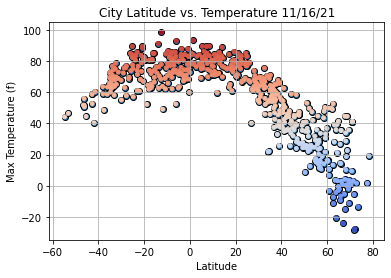

In [125]:
# Export the City_Data into a csv
weather_date = cities_df['Date'][0]

# Create scatter plot of Latitude vs Temperature
plt.scatter(
    cities_df['Latitude'], 
    cities_df['Max Temp (f)'],
    marker="o",  
    edgecolors="black")

# Labeling plots using plot titles  and axis labels
plt.title(f'City Latitude vs. Temperature {weather_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.grid(True)

# chose the coolwarm colormap to better indicate changes in temperature
plt.scatter(cities_df["Latitude"], cities_df["Max Temp (f)"], c=cities_df["Max Temp (f)"], s=15, cmap = "coolwarm", marker = "o")

# Save the plotted figures as .pngs.
plt.savefig("Images/latitude_vs_temperature.png")
plt.show()

# Latitude vs. Humidity Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Images/Latitude Vs Humidity.png'

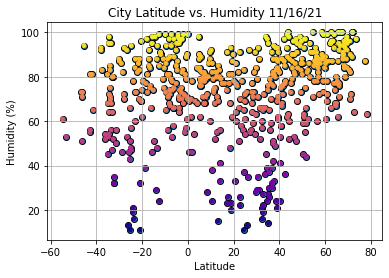

In [126]:
# Create scatter plot of Latitude vs Humidity Plot
plt.scatter(
    cities_df['Latitude'], 
    cities_df['Humidity (%)'],
    marker="o",  
    edgecolors="black")

# Labeling plots using plot titles  and axis labels
plt.title(f'City Latitude vs. Humidity {weather_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.scatter(cities_df["Latitude"], cities_df["Humidity (%)"], c=cities_df["Humidity (%)"], s=15, cmap = "plasma", marker = "o")

# Save the plotted figures as .pngs.
plt.savefig('Latitude Vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

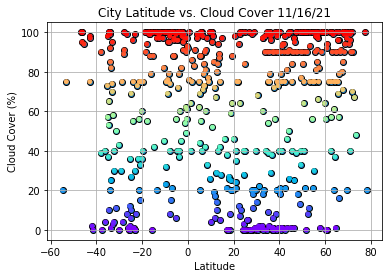

In [51]:
# Create scatter plot of Latitude vs Cloud Cover
plt.scatter(
    cities_df['Latitude'], 
    cities_df['Cloud Cover (%)'],
    marker="o",  
    edgecolors="black")

# Labeling plots using plot titles  and axis labels
plt.title(f'City Latitude vs. Cloud Cover {weather_date}')
plt.xlabel('Latitude')
plt.ylabel(f'Cloud Cover (%)')
plt.grid(True)
plt.scatter(cities_df["Latitude"], cities_df["Cloud Cover (%)"], c=cities_df["Cloud Cover (%)"],s=15, cmap = "rainbow", marker = "o")

# Save the plotted figures as .pngs.
plt.savefig('Images/Latitude Vs Cloud Cover.png')
plt.show()

## Latitude vs. Wind Speed Plot

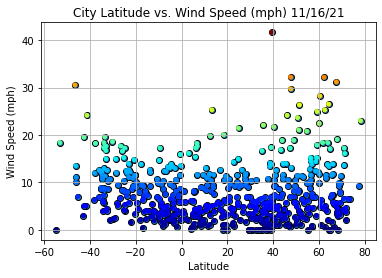

In [52]:
# Create scatter plot of Latitude vs Wind Speed
plt.scatter(
    cities_df['Latitude'], 
    cities_df['Wind Speed (mph)'],
    marker='o',  
    edgecolors='black')

# Labeling plots using plot titles  and axis labels
plt.title(f'City Latitude vs. Wind Speed (mph) {weather_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed (mph)"], c=cities_df["Wind Speed (mph)"], s=15, cmap = "jet", marker = "o")

# Save the plotted figures as .pngs.
plt.savefig('Images/Latitude Vs Wind Speed.png')
plt.show()


## Linear Regression

In [127]:
# Create a function to create Linear Regression plots
def line_regress_plot(x_values, y_values,x_label, y_label, hem, x_ann, y_ann):
  
    
    # Define date of Weather
    weather_date = cities_df['Date'][0]
    #Define file name
    file_name = f'{hem}_Hem {x_label} vs. {y_label}.png'
        
    # Calculate and add linear regression equation to the scatter plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    line_eqn = f'Y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.scatter(x_values,y_values,edgecolor='black', facecolor=('mediumpurple'), alpha=0.5, marker = "o")
    plt.plot(x_values, regress_values,'r-')
    plt.annotate(line_eqn,(x_ann,y_ann),fontsize=15, color='indigo')
    plt.title(f'{hem} Hemisphere\nCity {x_label} vs. {y_label} {weather_date}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.get_cmap("inferno")
    print(f'The r-squared is: {rvalue**2}')
    print(f'The regression line equation is: {line_eqn}')
    
    plt.savefig(f'{file_name}')
    plt.show()

In [128]:
# Create Northern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df['Latitude'] > 0]
northern_df.head()

,Date,City,Country,Latitude,Longitude,Max Temp (f),Humidity (%),Cloud Cover (%),Wind Speed (mph)
0,11/16/21,Provideniya,RU,64.3833,-173.3000,21.31,68,75,13.42
3,11/16/21,Albany,US,42.6001,-73.9662,36.09,78,21,1.01
6,11/16/21,Tuktoyaktuk,CA,69.4541,-133.0374,-11.20,84,20,5.75
7,11/16/21,Jamestown,US,42.0970,-79.2353,35.51,97,90,7.00
8,11/16/21,Bubaque,GW,11.2833,-15.8333,82.11,73,19,9.37


In [129]:
# Create Southern Hemisphere DataFrames
southern_df = cities_df.loc[cities_df['Latitude'] < 0]
southern_df.head()

,Date,City,Country,Latitude,Longitude,Max Temp (f),Humidity (%),Cloud Cover (%),Wind Speed (mph)
1,11/16/21,Cape Town,ZA,-33.9258,18.4232,68.11,71,20,5.75
2,11/16/21,Ushuaia,AR,-54.8000,-68.3000,44.26,61,20,0.00
4,11/16/21,São João da Barra,BR,-21.6403,-41.0511,68.27,86,36,8.57
5,11/16/21,Mahébourg,MU,-20.4081,57.7000,82.26,69,75,11.50
10,11/16/21,Penha,BR,-26.7694,-48.6458,68.72,92,99,6.64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7874700866513272
The regression line equation is: Y = -1.2x + 94.65


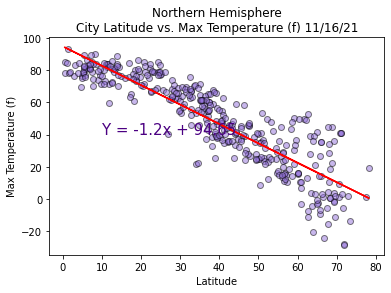

In [130]:
line_regress_plot(northern_df['Latitude'], northern_df['Max Temp (f)'],'Latitude', 'Max Temperature (f)', 'Northern', 10,40)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.26839278869983363
The regression line equation is: Y = 0.42x + 80.28


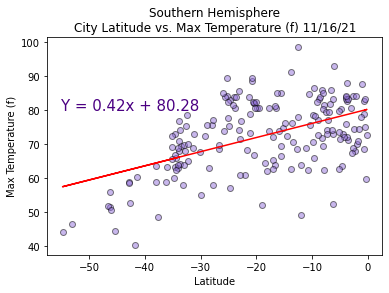

In [131]:
line_regress_plot(southern_df['Latitude'], southern_df['Max Temp (f)'],'Latitude', 'Max Temperature (f)', 'Southern', -55, 80)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10611775384537245
The regression line equation is: Y = 0.34x + 59.76


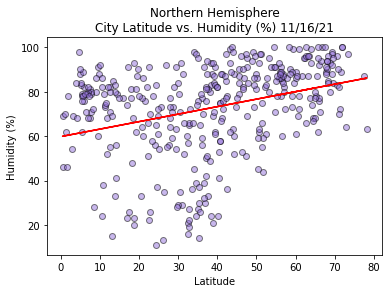

In [132]:
line_regress_plot(northern_df['Latitude'], northern_df['Humidity (%)'],'Latitude', 'Humidity (%)', 'Northern', 45, 5)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0703366107111635
The regression line equation is: Y = 0.4x + 79.85


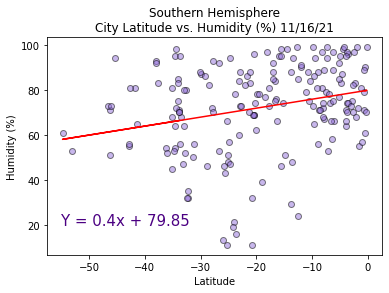

In [133]:
line_regress_plot(southern_df['Latitude'], southern_df['Humidity (%)'],'Latitude', 'Humidity (%)', 'Southern', -55, 20)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.043639582586019215
The regression line equation is: Y = 0.39x + 45.77


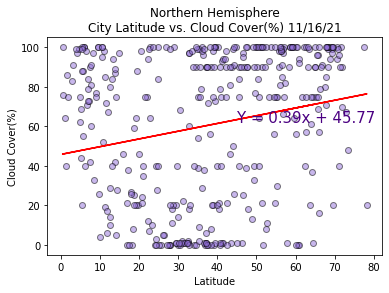

In [134]:
line_regress_plot(northern_df['Latitude'], northern_df['Cloud Cover (%)'],'Latitude', 'Cloud Cover(%)', 'Northern', 45, 62)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07732055106876683
The regression line equation is: Y = 0.74x + 80.82


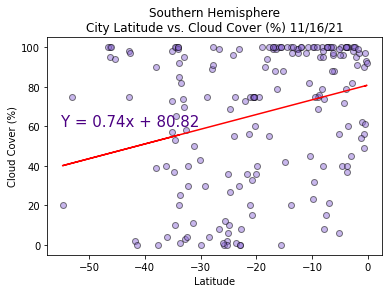

In [135]:
line_regress_plot(southern_df['Latitude'], southern_df['Cloud Cover (%)'],'Latitude', 'Cloud Cover (%)', 'Southern', -55, 60)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.032395203322212
The regression line equation is: Y = 0.06x + 5.24


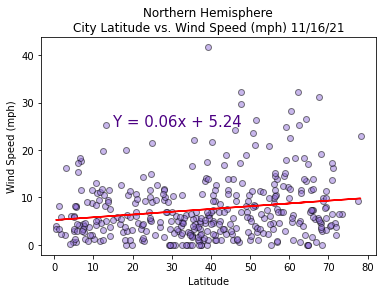

In [120]:
line_regress_plot(northern_df['Latitude'], northern_df['Wind Speed (mph)'],'Latitude', 'Wind Speed (mph)', 'Northern', 15, 25)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13886712334437304
The regression line equation is: Y = -0.14x + 5.55


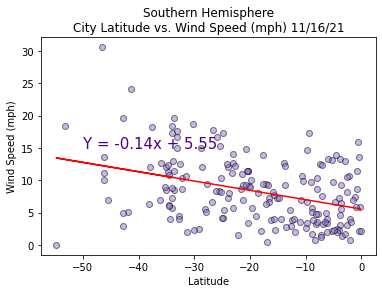

In [121]:
line_regress_plot(southern_df['Latitude'], southern_df['Wind Speed (mph)'],'Latitude', 'Wind Speed (mph)', 'Southern', -50, 15)